# 任务3 基于人体骨骼点检测算法实现人体检测

## 职业能力目标

- 了解人体骨骼关键点检测在生活当中的应用场景；
- 掌握利用OpenCV实现图像的采集；
- 掌握调用算法接口，进行人体骨骼关键点检测；
- 理解如何使用多线程的方式实现图像采集和人体骨骼检测。

## 任务描述

本实验将实现用人体骨骼点检测算法库对实时采集的画面进行人体骨骼点检测。

## 任务要求

- 使用NLPose人体骨骼点检测算法库实例化人体骨骼点检测模型对象；
- 使用NL_Pose_ComInit方法初始化模型；
- 使用OpenCv的resize方法重置图像大小加快运行的速率；
- 使用OpenCv的circle方法绘制圆圈；
- 使用OpenCv的line方法绘制直线；
- 使用NL_Pose_InitVarIn方法读取图像数据；
- 使用NL_Pose_Process_C方法检测人体的个数；
- 使用NL_Pose_Exit方法释放算法内存。

## 任务实施

## 1. 人体骨骼关键点检测实验

### 1.1 人体骨骼关键点应用场景

  人体骨骼关键点检测是计算机视觉的基础性算法之一，在计算机视觉的其他相关领域的研究中都起到了基础性的作用，
  
  如行为识别、人物跟踪、步态识别等相关领域。具体应用主要集中在智能视频监控，病人监护系统，人机交互，虚拟现实，
  
  人体动画，智能家居，智能安防，运动员辅助训练等等。在该算法中，主要是针对以下关键点的检测


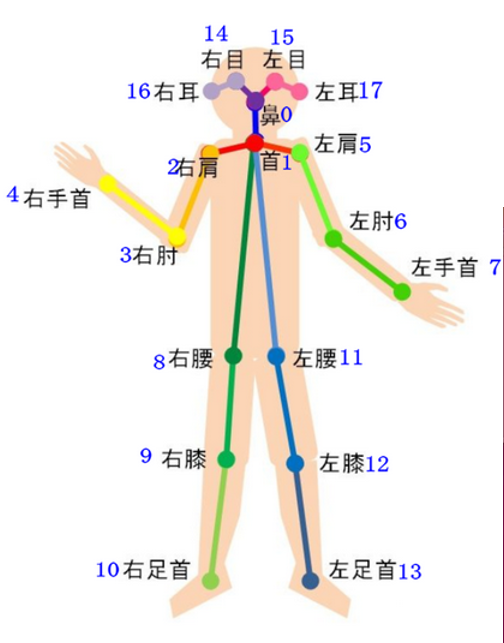

### 1.2 调用人体骨骼关键点算法接口

算法接口的调用，不但要进行识别检测，还要把结果显示在图片上，比如说把人体关节点和关节点的连线，全部描绘在图片上等等；

#### 1.2.1 导入人体骨骼关键点算法接口库

该人体骨骼关键点算法接口库是底层由C写的算法库，集成在核心开发板上，在经过python的对接后，形成了一套python的接口库，可以直接调用

In [ ]:
import cv2
from lib.posePoint import NLPose, gColors, gPosePairs

#### 1.2.2 实例化算法接口对象

`
nlPose = NLPose(libNamePath)
`

加载库，以及指定函数参数类型和返回值类型，并初始化结构体变量，`libNamePath`是固定库文件路径，执行没有报错，表示实例化成功

In [ ]:
libNamePath = "/usr/local/lib/libNL_ACTIONENC.so"  # 指定库文件路径
nlPose = NLPose(libNamePath)  # 实例化算法类

#### 1.2.3 加载模型和配置，并初始化

`
nlPose.NL_Pose_ComInit(configPath)
`

初始化配置，加载模型， `configPath`是模型和配置文件路径，执行没有报错，表示加载成功

In [ ]:
configPath = b"/usr/local/lib/rk3399_AI_model"  # 指定模型以及配置文件路径
nlPose.NL_Pose_ComInit(configPath)  # 加载模型并初始化

#### 1.2.4 加载图片数据

`
nlPose.NL_Pose_InitVarIn(image)
`

将采集到的图片数据，加载到算法中(`image`为图片数据)，返回0表示加载成功

因为算法中，采用的是`1280*960`的分辨率，需要把图片放大或者缩小成该分辨率的图像

##### 1.2.4.1 显示原始的目标图像

In [ ]:
import ipywidgets as widgets    # jupyter画图库
from IPython.display import display  # jupyter显示库

image1 = cv2.imread("./exp/body.jpg")
imgbox = widgets.Image()  # 定义一个图像盒子，用于装载图像数据
display(imgbox)  # 将盒子显示出来
imgbox.value = cv2.imencode('.jpg', image1)[1].tobytes() # 把图像值转成byte类型的值

##### 1.2.4.2 加载图片到算法

In [ ]:
height = image1.shape[0]
width = image1.shape[1]
if height != 960 or width != 1280:
    image = cv2.resize(image1, (1280, 960), interpolation=cv2.INTER_CUBIC)
ret1 = nlPose.NL_Pose_InitVarIn(image)
print(ret1)

#### 1.2.5 调用人体骨骼点检测主函数处理图像

返回人体的个数，并输出骨骼点的位置信息，在人体骨骼点输出结构体，可以获取相关信息

`
nlPose.NL_Pose_Process_C()
`

In [ ]:
person_num = nlPose.NL_Pose_Process_C()  # 返回值是目标个数
print('人体个数：', person_num)

#### 1.2.6 取出人体个数值

从人体骨骼点输出结构体里面，获取人脸个数

`
nlFaceDetect.djEDVarOut.num
`

In [ ]:
persion_num = nlPose.djACTVarOut.dwPersonNum
print('人体个数：', persion_num)

#### 1.2.7 根据人体个数，输出结果

循环取出人体骨骼关键点的位置信息和骨骼点连线，画在图片上，并打印出结果

#### （1）骨骼点连线的定义

骨骼点连线，每两个值是一条线，数组值为

`
gPosePairs = [1, 2, 1, 5, 2, 3, 3, 4, 5, 6, 6, 7, 1, 8, 8, 9, 9, 10, 1, 11, 11, 12, 12, 13, 1, 0, 0, 14, 14, 16, 0, 15, 15, 17]
`

#### （2）对应的颜色数组

颜色数组的是每三个值是一种颜色，对应线条的颜色

`
gColors = [255, 0, 85, 255, 0, 0, 255, 85, 0, 255, 170, 0, 255, 255, 0, 170, 255, 0,
           85, 255, 0, 0, 255, 0, 0, 255, 85, 0, 255, 170, 0, 255, 255, 0, 170, 255, 0,
           85, 255, 0, 0, 255, 255, 0, 170, 170, 0, 255, 255, 0, 255, 85, 0, 255]
`

#### （3）取出人体骨骼点位置信息


`djActionInfors = nlPose.djACTVarOut.pdjActionInfors[i]`  # 获取人体信息

`djActionInfors.dwPoseNum `# 关节点的个数

`djfPosePos.p_score  `# 关节点的置信度

`(int(djfPosePos.x), int(djfPosePos.y)) ` # 关节点坐标

#设置颜色

`color = (gColors[colorIndex + 2], gColors[colorIndex + 1], gColors[colorIndex])`

#### （4） 利用opencv在图像上画出关节圆点

`cv2.circle()`的作用是在图片关节点位置画上圆点

参数依次为：图片，关节点在图片上的位置，半径，字体颜色，圆形轮廓的粗细（如果为正）负厚度表示要绘制实心圆，圆边界的类型
`
cv2.circle(rgb, centerPoint, 3, color, 1, lineType)
`

#### （5）画出骨骼点的连线和头部矩形框

采用`cv2.line()`函数来画直线线条，参数依次为背景图（图片，起点坐标，终点坐标，颜色，画笔的粗细线宽，线条的类型）
`
cv2.line(image, keypoint1, keypoint2, color, LineScaled, lineType)
`

采用`cv2.rectangle()`的作用是根据坐标，描绘一个简单的矩形边框

参数依次为：图片，左上角右下角位置坐标，线条颜色，线条粗细
`
cv2.rectangle(limg, (int(outObject.x1), int(outObject.y1)),(int(outObject.x2), int(outObject.y2)), (0, 0, 255), 2)
`

### <font color=red size=3>动手练习1</font>

- 按照设置关节点颜色的方式在`<1>`处设定关节点线条的颜色

- 仿照关节点连线起始点的设定，在`<2>`处设置关节点连线终点

- 仿照头部右下角坐标横坐标设定方式，在`<3>`处设置头部右下角纵坐标，其中框高为`nlPose.djACTVarOut.pdjUpBodyPos[i].height`

**绘制完成后能够成功执行后续显示图片的代码，若画出人体骨骼点和连线，则说明成功**

In [ ]:
lineType = 8  # 线条的类型
threshold = 0.05  # 阈值,用于判断是否为骨骼点
for i in range(int(nlPose.djACTVarOut.dwPersonNum)):
    djActionInfors = nlPose.djACTVarOut.pdjActionInfors[i]  # 获取人体信息
    # 绘制关节点
    for pose in range(djActionInfors.dwPoseNum):   # 循环关节点的数量
        djfPosePos = djActionInfors.fPosePos[pose]   # 获取关节点的信息
        if djfPosePos.p_score > threshold:   # 判断关节点位置坐标的置信度，取大于0.05的值
            colorIndex = pose * 3  # 每三个值为一种颜色
            centerPoint = (int(djfPosePos.x), int(djfPosePos.y))  # 关节点坐标
            color = (gColors[colorIndex + 2], gColors[colorIndex + 1],
                     gColors[colorIndex])  # 设置颜色
            cv2.circle(image, centerPoint, 10, color, -1, lineType)  # 画出圆点
    # 绘制关节点连线
    for pair in range(0, len(gPosePairs), 2):   # 依据设定好的关键点连线，循环每条线
        fPosePos1 = djActionInfors.fPosePos[gPosePairs[pair]]  # 取出连线两端的点的坐标
        fPosePos2 = djActionInfors.fPosePos[gPosePairs[pair + 1]]
        if (fPosePos1.p_score > threshold) and (fPosePos2.p_score > threshold):  # 判断两个点的置信度都达标
            colorIndex = gPosePairs[pair + 1] * 3  # 每三个值为一种颜色,根据点位来获取颜色值
            color = <1> # 设置颜色
            keypoint1 = (int(fPosePos1.x), int(fPosePos1.y)) # 起始点
            keypoint2 = <2> # 终点
            cv2.line(image, keypoint1, keypoint2, color, LineScaled=5, lineType)  # 画线

    # 绘制头部矩形框
    RectPoint1 = (nlPose.djACTVarOut.pdjUpBodyPos[i].x, nlPose.djACTVarOut.pdjUpBodyPos[i].y) # 头部左上角坐标
    RectPoint2 = (nlPose.djACTVarOut.pdjUpBodyPos[i].x + nlPose.djACTVarOut.pdjUpBodyPos[i].width,  
                  <3>)  # 头部右下角坐标
    cv2.rectangle(image, RectPoint1, RectPoint2, (200, 0, 125), 5, 8)  # 画出矩形框

<details>
<summary><font color=red size=3>点击查看动手练习1答案</font></summary>
<pre><code>

```python
lineType = 8  # 线条的类型
threshold = 0.05  # 阈值,用于判断是否为骨骼点
for i in range(int(nlPose.djACTVarOut.dwPersonNum)):
    djActionInfors = nlPose.djACTVarOut.pdjActionInfors[i]  # 获取人体信息
    # 绘制关节点
    for pose in range(djActionInfors.dwPoseNum):   # 循环关节点的数量
        djfPosePos = djActionInfors.fPosePos[pose]   # 获取关节点的信息
        if djfPosePos.p_score > threshold:   # 判断关节点位置坐标的置信度，取大于0.05的值
            colorIndex = pose * 3  # 每三个值为一种颜色
            centerPoint = (int(djfPosePos.x), int(djfPosePos.y))  # 关节点坐标
            color = (gColors[colorIndex + 2], gColors[colorIndex + 1],
                     gColors[colorIndex])  # 设置颜色
            cv2.circle(image, centerPoint, 10, color, -1, lineType)  # 画出圆点
    # 绘制关节点连线
    for pair in range(0, len(gPosePairs), 2):   # 依据设定好的关键点连线，循环每条线
        fPosePos1 = djActionInfors.fPosePos[gPosePairs[pair]]  # 取出连线两端的点的坐标
        fPosePos2 = djActionInfors.fPosePos[gPosePairs[pair + 1]]
        if (fPosePos1.p_score > threshold) and (fPosePos2.p_score > threshold):  # 判断两个点的置信度都达标
            colorIndex = gPosePairs[pair + 1] * 3  # 每三个值为一种颜色,根据点位来获取颜色值
            color = (gColors[colorIndex + 2],
                     gColors[colorIndex + 1],
                     gColors[colorIndex])  # 设置颜色
            LineScaled = 5
            keypoint1 = (int(fPosePos1.x), int(fPosePos1.y)) # 起始点
            keypoint2 = (int(fPosePos2.x), int(fPosePos2.y)) # 终点
            cv2.line(image, keypoint1, keypoint2, color, LineScaled, lineType)  # 画线

    # 绘制头部矩形框
    RectPoint1 = (nlPose.djACTVarOut.pdjUpBodyPos[i].x, nlPose.djACTVarOut.pdjUpBodyPos[i].y) # 头部左上角坐标
    RectPoint2 = (nlPose.djACTVarOut.pdjUpBodyPos[i].x + nlPose.djACTVarOut.pdjUpBodyPos[i].width,  
                  nlPose.djACTVarOut.pdjUpBodyPos[i].y + nlPose.djACTVarOut.pdjUpBodyPos[i].height)  # 头部右下角坐标
    cv2.rectangle(image, RectPoint1, RectPoint2, (200, 0, 125), 5, 8)  # 画出矩形框
```

</code></pre>
</details>

#### 1.2.8 将经过算法处理的图像显示，并释放内存

利用jupyter的画图库和显示库，来显示获取的图片，并释放内存和模型

In [ ]:
import ipywidgets as widgets    # jupyter画图库
from IPython.display import display  # jupyter显示库
import cv2
from lib.posePoint import NLPose, gColors, gPosePairs
import time
 
imgbox = widgets.Image()  # 定义一个图像盒子，用于装载图像数据
display(imgbox)  # 将盒子显示出来
imgbox.value = cv2.imencode('.jpg', image)[1].tobytes() # 把图像值转成byte类型的值

nlPose.NL_Pose_Exit() # 释放算法内存和模型

### 1.3 利用多线程方式实现视频流的人体骨骼检测

利用多线程，使图像采集和算法识别同时运行，从而实现视频流的人脸检测，并且可以避免一些因花时间太久，导致的视频卡顿

#### 1.3.1. 引入相关的库

#### (1) threading线程库

多线程类似于同时执行多个不同程序，多线程运行有如下优点：

- 使用线程可以把占据长时间的程序中的任务放到后台去处理。
- 用户界面可以更加吸引人，比如用户点击了一个按钮去触发某些事件的处理，可以弹出一个进度条来显示处理的进度。
- 程序的运行速度可能加快。
- 在一些等待的任务实现上如用户输入、文件读写和网络收发数据等，线程就比较有用了。在这种情况下我们可以释放一些珍贵的资源如内存占用等等。

每个独立的线程有一个程序运行的入口、顺序执行序列和程序的出口。

但是线程不能够独立执行，必须依存在应用程序中，由应用程序提供多个线程执行控制。

In [ ]:
import time   # 时间库
import cv2      # 引入opencv图像处理库
import threading   # 这是python的标准库，线程库
import ipywidgets as widgets    # jupyter画图库
from IPython.display import display  # jupyter显示库
from lib.posePoint import NLPose, gColors, gPosePairs  # 引入骨骼秒点算法库

#### 1.3.2. 定义摄像头采集线程

结合上面的opencv采集图像的内容，利用多线程的方式串起来，形成一个可传参，可调用的通用类。

这里定义了一个全局变量`camera_img`，用作存储获取的图片数据，以便于其他线程可以调用

- `init`初始化函数

实例化该线程的时候，会自动执行初始化函数，在初始化函数里面，打开摄像头，并设置分率

- `run`函数

该函数是在实例化后，执行`start`启动函数的时候，会自动执行。在该函数里，实现了循环获取图像的内容

In [ ]:
class CameraThread(threading.Thread):
    def __init__(self, camera_id, camera_width, camera_height):
        threading.Thread.__init__(self)
        self.working = True
        self.cap = cv2.VideoCapture(camera_id)  # 打开摄像头
        self.cap.set(cv2.CAP_PROP_FRAME_WIDTH, camera_width)  # 设置摄像头分辨率宽度
        self.cap.set(cv2.CAP_PROP_FRAME_HEIGHT, camera_height)  # 设置摄像头分辨率高度
        
    def run(self):
        global camera_img     # 定义一个全局变量，用于存储获取的图片，以便于算法可以直接调用
        camera_img = None
        while self.working:
            ret, image = self.cap.read()  # 获取新的一帧图片
            if ret:
                camera_img = image
            
    def stop(self):
        self.working = False
        self.cap.release()

#### 1.3.3 定义算法识别线程

结合调用算法接口的内容和图像显示内容，利用多线程的方式整合起来，循环识别，

对摄像头采集线程中获取的每一帧图片进行识别，并显示，形成视频流的画面

- `init`初始化函数

实例化该线程的时候，会自动执行初始化函数，在初始化函数里面，定义了显示内容，并实例化算法和加载模型

- `pose_init()`函数

该函数是人体骨骼关键点的初始化内容，加载算法库，模型和配置初始化

- `run`函数

该函数是在实例化后，执行`start`启动函数的时候，会自动执行。

在该函数是一个循环，实现了对采集的每一帧图片进行算法识别，然后将结果绘画在图片上，并将处理后的图片显示出来

In [ ]:
class PoseDetectThread(threading.Thread):
    def __init__(self):
        threading.Thread.__init__(self)
        self.working = True
        self.running = False
        self.isInit = False
        self.imgbox = widgets.Image()  # 定义一个图像盒子，用于装载图像数据
        display(self.imgbox)  # 将盒子显示出来
        self.libNamePath = "/usr/local/lib/libNL_ACTIONENC.so"  # 指定库文件路径
        self.configPath = b"/usr/local/lib/rk3399_AI_model"  # 指定模型以及配置文件路径
#         self.lock = threading.Lock()
        
    def pose_init(self):
        """
        骨骼描点初始化
        """
        if not self.isInit:
            self.nlPose = NLPose(self.libNamePath)  # 实例化算法类
            if self.nlPose == -1001:
                print('NL_Pose Error code:', self.nlPose)
                quit()
            ret = self.nlPose.NL_Pose_ComInit(self.configPath)  # 加载模型并初始化
            if ret != 0:
                print('ComInit Error code:', ret)
            self.isInit = True
        
    def run(self):
        self.running = True
        self.pose_init()
        # 显示图像，把摄像头线程采集到的数据，全局变量camera_img，转换后，装在在盒子里，全局变量是不断更新的
        lineType = 8  # 线条类型
        threshold = 0.05  # 阈值
        while self.working:
            try:
                if camera_img is not None:
                    limg = camera_img # 获取全局变量图像值
                    # height = limg.shape[0]
                    # width = limg.shape[1]
                    # if height != 960 or width != 1280:
                    #     limg = cv2.resize(limg, (1280, 960), interpolation=cv2.INTER_CUBIC)
                    if self.nlPose.NL_Pose_InitVarIn(limg) == 0:
                        if self.nlPose.NL_Pose_Process_C() > 0: # 返回值是目标个数
                            # 人体骨骼点结果输出
                            for i in range(int(self.nlPose.djACTVarOut.dwPersonNum)):
                                djActionInfors = self.nlPose.djACTVarOut.pdjActionInfors[i]  # 获取人体信息
                                # 绘制关节点
                                for pose in range(djActionInfors.dwPoseNum):   # 循环关节点的数量
                                    djfPosePos = djActionInfors.fPosePos[pose]   # 获取关节点的信息
                                    if djfPosePos.p_score > 0.05:   # 判断关节点位置坐标的置信度，取大于0.05的值
                                        colorIndex = pose * 3
                                        centerPoint = (int(djfPosePos.x), int(djfPosePos.y))  # 关节点坐标
                                        color = (
                                            gColors[colorIndex + 2], gColors[colorIndex + 1],
                                            gColors[colorIndex])
                                        cv2.circle(limg, centerPoint, 3, color, 1, lineType)
                                # 绘制关节点连线
                                for pair in range(0, len(gPosePairs), 2):   # 依据设定好的关键点连线，循环每条线
                                    fPosePos1 = djActionInfors.fPosePos[gPosePairs[pair]]
                                    fPosePos2 = djActionInfors.fPosePos[gPosePairs[pair + 1]]
                                    if (fPosePos1.p_score > threshold) and (fPosePos2.p_score > threshold):
                                        colorIndex = gPosePairs[pair + 1] * 3
                                        color = (gColors[colorIndex + 2],
                                                 gColors[colorIndex + 1],
                                                 gColors[colorIndex])

                                        keypoint1 = (int(fPosePos1.x), int(fPosePos1.y))
                                        keypoint2 = (int(fPosePos2.x), int(fPosePos2.y))
                                        cv2.line(limg, keypoint1, keypoint2, color, 5, lineType)

                                # 绘制上半身矩形框
                                RectPoint1 = (self.nlPose.djACTVarOut.pdjUpBodyPos[i].x, self.nlPose.djACTVarOut.pdjUpBodyPos[i].y)
                                RectPoint2 = (self.nlPose.djACTVarOut.pdjUpBodyPos[i].x + self.nlPose.djACTVarOut.pdjUpBodyPos[i].width,
                                              self.nlPose.djACTVarOut.pdjUpBodyPos[i].y + self.nlPose.djACTVarOut.pdjUpBodyPos[i].height)
                                cv2.rectangle(limg, RectPoint1, RectPoint2, (200, 0, 125), 5, 8)
                    self.imgbox.value = cv2.imencode('.jpg', limg)[1].tobytes() # 把图像值转成byte类型的值
                # time.sleep(0.01)
            except Exception as e:
                pass
        self.running = False
            
    def stop(self):
        self.working = False
        while self.running:
            pass
        if self.isInit:
            self.nlPose.NL_Pose_Exit()

#### 1.3.4 调用两个线程，启动视频流的人体骨骼点检测 
实例化两个线程，并启动这两个线程，实现完整的人脸检测功能，运行时，加载模型比较久，需要等待几秒

 ### <font color=red size=3>动手练习2</font>
 
- 在`<1>`处实例化摄像头线程`CameraThread()`，设置摄像头id为`0`，分辨率宽`1280`，分辨率高`960`

- 在`<2>`处实例化人体骨骼检测线程`PoseDetectThread()`

- 在`<3>`处使用`camera_th.start()`方法启动线程

- 在`<4>`处使用`pose_detect_th.start()`方法启动线程

**填写完成后，运行代码，若能够出现视频流人体骨骼检测则说明填写正确。**

In [ ]:
<1>
<2>

<3>
<4>

<details>
<summary><font color=red size=3>点击查看动手练习2答案</font></summary>
<pre><code>

```python
camera_th = CameraThread(0, 1280, 960)
pose_detect_th = PoseDetectThread()

camera_th.start()
pose_detect_th.start()
```
</code></pre>
</details>

#### 1.3.5 停止线程

为了避免占用资源，结束实验时需要停止摄像头采集线程和算法识别线程，或者重启内核

In [ ]:
camera_th.stop()
pose_detect_th.stop()

## 任务小结

本次实验的收获：

- 了解了人体骨骼关键点检测在生活当中的应用场景；
- 学会了使用多线程的方式，并调用算法接口实现实时的人体骨骼关键点检测。